In [3]:
import dabl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from dabl.preprocessing import detect_types
from dabl.plotting import plot_supervised

In [5]:
avocado = pd.read_csv("/home/andy/datasets/avocado.csv", parse_dates=['Date'])
telco_churn = pd.read_csv("/home/andy/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#restaurant = pd.read_csv("/home/andy/datasets/restaurant-and-market-health-violations.csv")
titanic = pd.read_csv("dabl/tests/titanic.csv")
ames = pd.read_excel("/home/andy/datasets/AmesHousing.xls")
cars = pd.read_excel("/home/andy/datasets/2018 FE Guide for DOE-release dates before 1-24-2018-no-sales-1-23-2018public.xlsx")
target = 'Comb Unadj FE - Conventional Fuel'
#accidents = pd.read_csv("/home/andy/datasets/Acc.csv")
#violations = pd.read_csv("/home/andy/datasets/Traffic_Violations.csv")
adult = pd.read_csv("/home/andy/datasets/adult.csv")

# individual_donations = pd.read_csv("/home/andy/datasets/itcont.txt")
# FIXME add rent stuff from first year
# FIXME add stuff from Gael's papers

In [6]:
def make_data_df(data_bunch):
    try:
        feature_names = data_bunch.feature_names
    except AttributeError:
        feature_names = ['x%d' % i for i in range(data_bunch.data.shape[1])]
    df = pd.DataFrame(data_bunch.data, columns=feature_names)
    try:
        df['target'] = data_bunch.target_names[data_bunch.target]
    except AttributeError:
        df['target'] = data_bunch.target
    return df

from sklearn.datasets import load_diabetes, load_boston, load_iris, load_digits, load_breast_cancer
diabetes = load_diabetes()
boston = load_boston()

In [7]:
#titanic = pd.read_csv("fml/tests/titanic.csv", na_values=['?'])
data = pd.read_csv("dabl/tests/titanic.csv")
target = 'survived'

In [8]:
data = pd.read_excel("/home/andy/datasets/AmesHousing.xls")

target = 'SalePrice'


In [9]:
data = make_data_df(load_digits())
target = 'target'

In [11]:
from dabl.preprocessing import clean
data_clean = clean(data)

types = detect_types(data)


/home/andy/checkout/dabl/dabl/preprocessing.py:209: UserWarning: Discarding near constant features: ['x0', 'x7', 'x8', 'x15', 'x16', 'x23', 'x24', 'x31', 'x32', 'x39', 'x40', 'x47', 'x48', 'x56']
  near_constant.index[near_constant].tolist()))
/home/andy/checkout/dabl/dabl/preprocessing.py:209: UserWarning: Discarding near constant features: ['x0', 'x7', 'x8', 'x15', 'x16', 'x23', 'x24', 'x31', 'x32', 'x39', 'x40', 'x47', 'x48', 'x56']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 50 continuous features
baseline score: 0.100
baseline score: 0.100
baseline score: 0.100


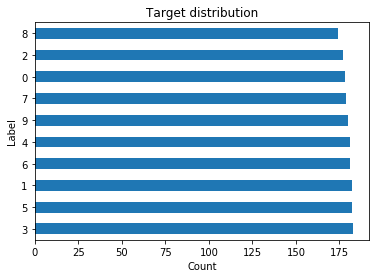

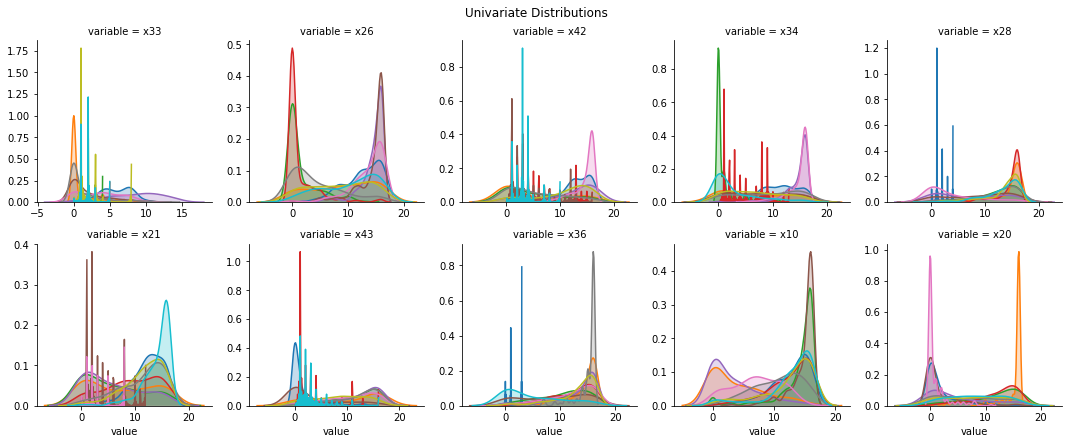

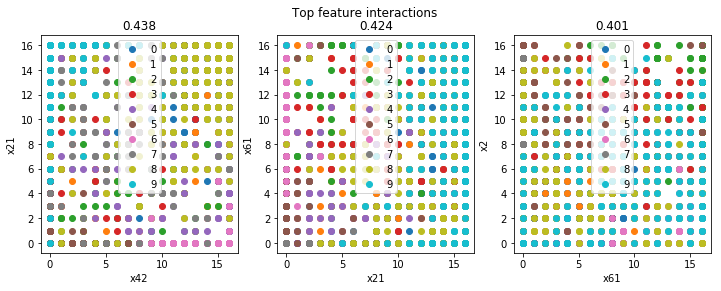

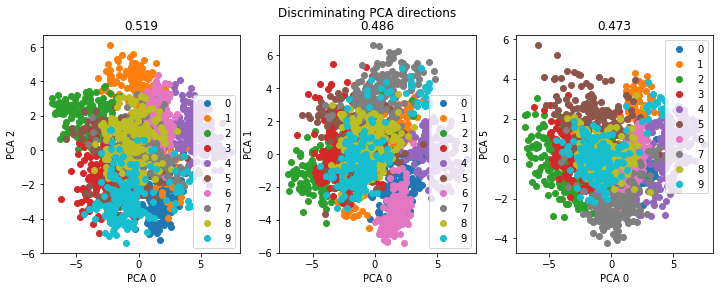

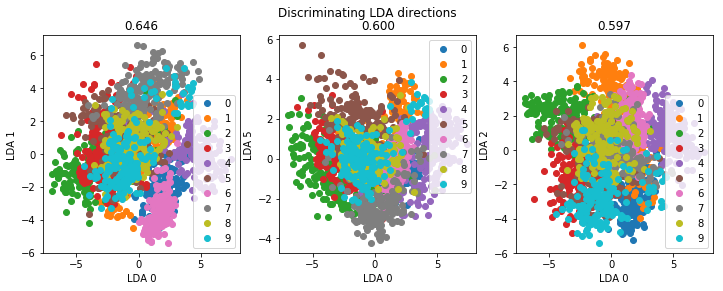

In [12]:
plot_supervised(data_clean, target)

In [ ]:
from dabl.preprocessing import EasyPreprocessor

In [ ]:
# sp = FriendlyPreprocessor(verbose=10)
# sp.fit(avocado)

In [ ]:
y = telco_churn.Churn
X = telco_churn.drop("Churn", axis=1)

In [ ]:
y.value_counts() / y.size

In [ ]:
from fml.models import FriendlyClassifier

In [ ]:
# %%prun -s cumulative -l 100 -D test.prof
fc = FriendlyClassifier().fit(X, y)

In [ ]:
# from sklearn.datasets import fetch_openml
# adult = fetch_openml("adult-census")
# adult_df = pd.DataFrame(adult.data, columns=adult.feature_names)

In [ ]:
y = adult.income
X = adult.drop("income", axis=1)

In [ ]:
X.columns

In [ ]:
X.shape

In [ ]:
from fml.preprocessing import detect_types_dataframe
detect_types_dataframe(X)

In [ ]:
n_values = X.apply(lambda x: x.nunique())
n_values

In [ ]:
fc = FriendlyClassifier().fit(X, y)

In [ ]:
from fml.preprocessing import detect_types_dataframe

In [ ]:
asdf = detect_types_dataframe(X, verbose=10)

In [ ]:
asdf.categorical

In [ ]:
"".join("{}: {} ".format(a, b) for a, b in asdf.categorical.items())

In [ ]:
X_cleanish.shape

In [ ]:
fp = FriendlyPreprocessor()
fp.fit_transform(X_cleanish).shape

In [ ]:
%%prun -s cumulative -l 100 -D test.prof
X_cleanish = safe_cleanup(X, onehot=True)
fc = FriendlyClassifier().fit(X_cleanish, y)